In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#sklearn packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [61]:
#importing data
train_data = pd.read_csv('C:/Users/Nikita/OneDrive/Desktop/Course_Materials/Data Mining Techniques/Assignments/data-mining-techniques/task2_titanic/titanic_data/train.csv')
test_data = pd.read_csv('C:/Users/Nikita/OneDrive/Desktop/Course_Materials/Data Mining Techniques/Assignments/data-mining-techniques/task2_titanic/titanic_data/test.csv')
combine_1 = [train_data, test_data]

In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Check number of missing values for each column in training set
train_data.isnull().sum()
#Age, Cabin and Embarked have missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Check number of missing values for each column in test set
test_data.isnull().sum()
# Age, Fare and, Cabin have missing values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Features that could contribute to a high survival rate
Pclass (socio-econimic status) (Fare is directly realted to Pclass), Sex, and Age.

In [9]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
#survival rate by Pclass
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Around 62% of 1st class passengers survived compared to 47% and 24% for 2nd and 3rd class passengers respectively

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

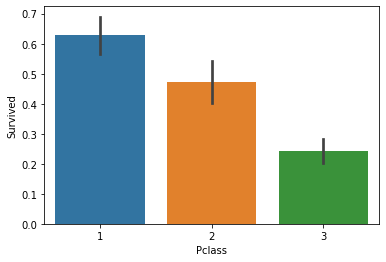

In [11]:
sns.barplot(x='Pclass',y='Survived',data=train_data)

In [12]:
#survival rate based on sex 
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Almost 75% of feamles survived, compared to 19% for males 

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

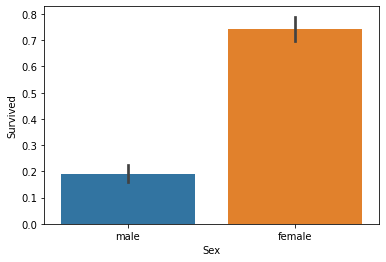

In [13]:
sns.barplot(x='Sex',y='Survived',data=train_data)

## Cleaning Data

In [14]:
#### Converting categorical data into numerical

In [62]:
for dataset in combine_1:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
        

In [63]:
#converting Age from float to int64

for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)

In [64]:
#177 data points for age were missing. 
#To correct this, randomized age data is generated using the mean age and standard deviation of the data 

# mean and std of Age
mean_age = train_data['Age'].mean() #29.799102132435465 = 29.8
std_age = train_data['Age'].std() #14.467438809609039 = 14.5

#number of missing values (non number values) for Age
non_num = train_data['Age'].isna().sum() #177

#generating random ages from mean and standard dev
random_age = mean_age + std_age * np.random.randn(non_num)

#replace missing values with random_age(random values)
train_data.loc[train_data['Age'].isna(), 'Age'] = random_age

In [65]:
# Doing the same for test data, replacing missing values for age
# mean and std of Age
test_mean_age = test_data['Age'].mean() #30.272590361445783 = 30.3
test_std_age = test_data['Age'].std() #14.18120923562442 = 14.2

#number of missing values (non number values) for Age
test_non_num = test_data['Age'].isna().sum() #86

#generating random ages from mean and standard dev
test_random_age = test_mean_age + test_std_age * np.random.randn(test_non_num)

#replace missing values with random_age(random values)
test_data.loc[test_data['Age'].isna(), 'Age'] = test_random_age

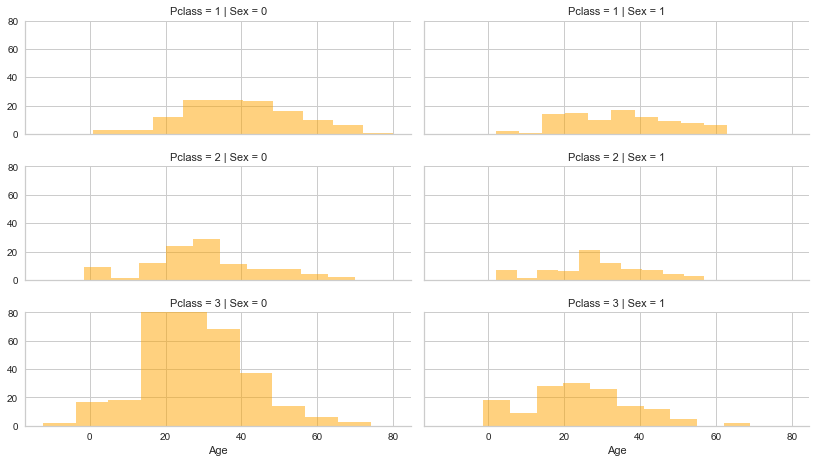

In [66]:
grid = sns.FacetGrid(train_data, row= 'Pclass', col= 'Sex', height = 2.2, aspect = 2.6)
grid.map(plt.hist, 'Age', alpha= .5, bins=10, color= 'orange')
plt.ylim((0,80))
grid.add_legend()

#### Replacing missing categorical data for 'Embarked'

In [93]:
#most frequently used port
port = train_data.Embarked.dropna().mode()[0]
port #'S', i.e., S = Southampton is the most common port used

'S'

In [94]:
for dataset in combine_1:
    dataset['Embarked'] = dataset['Embarked'].fillna(port)

In [95]:
#Checking survival rate by port used
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


About 55% of passengers that used the port C = Cherbourg survived compared to 39% for Q = Queenstown, and 34% for S = Southampton

In [96]:
#converting categorical 'Embarked' to numeric
#this creates a unifying data type for analysis

# S = Southampton = 0, C = Cherbourg = 1, Q = Queenstown = 2

for dataset in combine_1:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [97]:
#converting Fare from float to int64

for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [98]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [99]:
train_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.025211,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.081456,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.294354,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.078598,0.114631,0.245489,0.182333,0.116569
Age,0.025211,-0.081456,-0.294354,-0.078598,1.000000,-0.225308,-0.159909,0.083860,0.052581
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.225308,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.159909,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.083860,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.052581,-0.059961,-0.078665,0.062142,1.000000


#### Dropping columns with mixed data types and missing values, which do not seem to affect survival rate significantly

In [100]:
#df.drop(['C', 'D'], axis = 1)
  
train_df = train_data.drop(['Ticket', 'Cabin', 'Name'], axis = 1)
#test_data = test_data.drop(test_data.columns[['Ticket', 'Cabin', 'Name',]], axis=1, inplace = True)
#combine_data = [train_df, test_df]

In [101]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [102]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [103]:
test_df = test_data.drop(['Ticket', 'Cabin', 'Name'], axis = 1)

In [104]:
combine = [train_df, test_df]

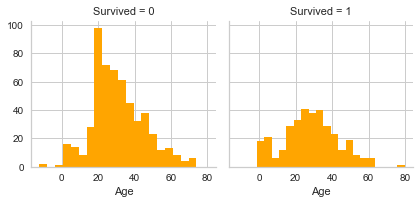

In [105]:
# Age and survival rate 'Survived'= 0 = No, 'Survived'= 1 = Yes
age_hist = sns.FacetGrid(train_df, col= 'Survived')
age_hist.map(plt.hist, 'Age', bins = 20, color = "Orange")

In [106]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.025211,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.081456,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.294354,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.078598,0.114631,0.245489,0.182333,0.116569
Age,0.025211,-0.081456,-0.294354,-0.078598,1.000000,-0.225308,-0.159909,0.083860,0.052581
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.225308,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.159909,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.083860,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.052581,-0.059961,-0.078665,0.062142,1.000000


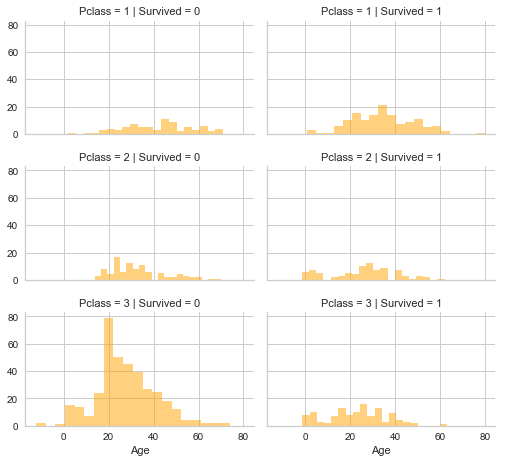

In [107]:
# Survival rate by Age and Passenger class
grid = sns.FacetGrid(train_data, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20, color = "Orange")
grid.add_legend();

C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Nikita\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


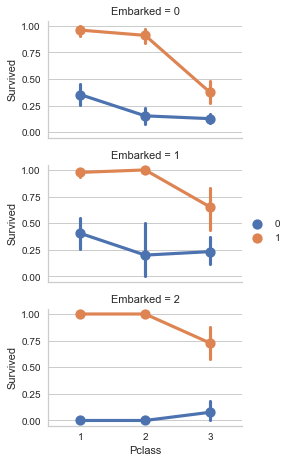

In [108]:
#Survival by Sex, Passenger Class and Embarking Port
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Prediction Models

In [109]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

In [110]:
from sklearn import (
    ensemble, 
    preprocessing, 
    tree,
)
from sklearn.metrics import (
auc,
confusion_matrix,
roc_auc_score,
roc_curve
)
from sklearn.model_selection import (
train_test_split,
)
from yellowbrick.classifier import (
ConfusionMatrix,
ROCAUC,
)
from yellowbrick.model_selection import (
LearningCurve,
)

In [111]:
X_train, X_test, y_train, y_test = train_test_split (X_train, Y_train, test_size = 0.3, random_state = 42)

In [112]:
from sklearn.dummy import DummyClassifier
bm = DummyClassifier ()
bm.fit (X_train, y_train)
bm.score (X_test, y_test) # accuracy = 0.585820895522388

0.585820895522388

In [113]:
from sklearn import metrics
metrics.precision_score (y_test, bm.predict (X_test))

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [114]:
#K-fold cross-validation
X = pd.concat ([X_train, X_test])
y = pd.concat ([y_train, y_test])
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

for model in [
    DummyClassifier,
    LogisticRegression,
    DecisionTreeClassifier,
    KNeighborsClassifier, 
    GaussianNB,
    SVC,
    RandomForestClassifier,
    ]:
    cls = model ()
    kfold = model_selection.KFold (n_splits=10, random_state=None)
    s = model_selection.cross_val_score (
    cls, X, y, scoring = 'roc_auc', cv = kfold)

    print (f"{model.__name__:22}   AUC: "
          f"{s.mean (): .3f} STD: {s.std(): .2f}")

DummyClassifier          AUC:  0.500 STD:  0.00


C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression       AUC:  0.842 STD:  0.06
DecisionTreeClassifier   AUC:  0.736 STD:  0.02
KNeighborsClassifier     AUC:  0.620 STD:  0.06
GaussianNB               AUC:  0.836 STD:  0.06
SVC                      AUC:  0.703 STD:  0.05
RandomForestClassifier   AUC:  0.866 STD:  0.04


In [115]:
from mlxtend.classifier import StackingClassifier
clfs = [
    x()
    for x in [
        LogisticRegression,
        DecisionTreeClassifier,
        GaussianNB,
        SVC,
        RandomForestClassifier
    ]
]
stack = StackingClassifier (classifiers=clfs,
                          meta_classifier = LogisticRegression ())
kfold = model_selection.KFold (n_splits = 10, random_state = None)

s = model_selection.cross_val_score (stack, X, y, scoring = 'roc_auc', cv = kfold)

print (f"{stack.__class__.__name__}  "
      f"AUC: {s.mean():.3f}  STD: {s.std():.2f}")

ModuleNotFoundError: No module named 'mlxtend'

In [116]:
# create model
rf = ensemble.RandomForestClassifier (n_estimators = 100, random_state = 42)
rf.fit (X_train, y_train)

# evaluate model
rf.score (X_test, y_test) #0.8134328358208955

0.8134328358208955

In [117]:
# metrics precision
metrics.precision_score (y_test, rf.predict (X_test)) #0.8426966292134831

0.8426966292134831

In [118]:
# inspect feature performance
for col, val in sorted (zip (X_train.columns, rf.feature_importances_),
                       key = lambda x: x[1], reverse = True,
                       )[:5]:
    print (f"{col:10}{val:10.3f}")

Sex            0.240
Fare           0.193
PassengerId     0.191
Age            0.182
Pclass         0.081


In [119]:
rf4 = ensemble.RandomForestClassifier ()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [15, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [42],
}
cv = model_selection.GridSearchCV (rf4, params, n_jobs=-1
                                  ).fit(X_train, y_train)
print (cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 42}


In [120]:
rf5 = ensemble.RandomForestClassifier (
**{
    "max_features": "auto",
    "min_samples_leaf": 0.1,
    "n_estimators": 200,
    "random_state": 42,
})
rf5.fit (X_train, y_train)

rf5.score (X_test, y_test) #0.7350746268656716

0.7350746268656716

In [121]:
from sklearn.metrics import confusion_matrix
y_pred = rf5.predict (X_test)
confusion_matrix (y_test, y_pred)

array([[140,  17],
       [ 54,  57]], dtype=int64)

C:\Users\Nikita\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


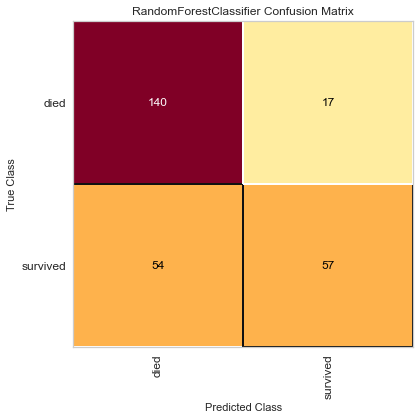

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [122]:
mapping = {0: "died", 1: "survived"}
fig, ax = plt.subplots (figsize = (6, 6))
cm_viz = ConfusionMatrix (rf5, classes = ["died", "survived"],
                         label_encoder = mapping)
cm_viz.score (X_test, y_test)
cm_viz.poof ()

In [123]:
y_pred = rf5.predict (X_test)
roc_auc_score (y_test, y_pred) #0.7026166293682218

0.7026166293682218

C:\Users\Nikita\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


AttributeError: 'RandomForestClassifier' object has no attribute 'target_type_'

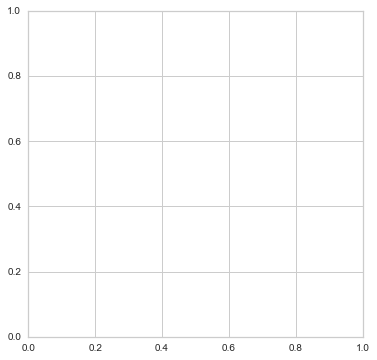

In [124]:
fig, ax = plt.subplots (figsize = (6, 6))
roc_viz = ROCAUC (rf5)
roc_viz.score (X_test, y_test)

C:\Users\Nikita\anaconda3\lib\site-packages\yellowbrick\base.py:236: YellowbrickWarning: ROCAUC does not have a reference to a matplotlib.Axes the figure may not render as expected!
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


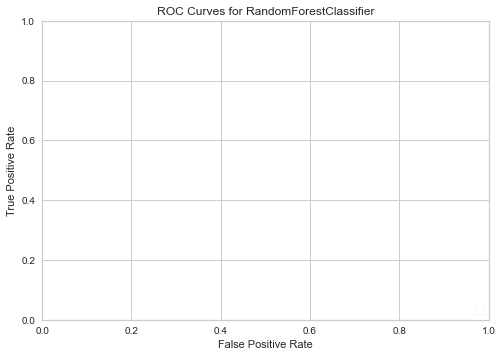

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [125]:
roc_viz.poof ()

NameError: name 'StratifiedKFold' is not defined

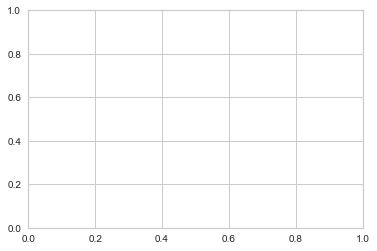

In [126]:
import numpy as np
fig, ax = plt.subplots (figsize = (6, 4))
cv = StratifiedKFold (12)
sizes = np.linspace (0.3, 1.0, 10)
lc_viz = LearningCurve (
rf5, 
cv = cv,
train_sizes = sizes,
scoring = "f1_wighted",
n_jobs = 4,
ax = ax)

lc_viz.fit (X, y)
lc_viz.poof ()

In [127]:
import pickle
pic = pickle.dumps (rf5)
rf6 = pickle.loads (pic)
y_pred = rf6.predict (X_test)
roc_auc_score (y_test, y_pred) #0.7026166293682218

0.7026166293682218

In [128]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [140]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,0
1,2,1,1,1,38,1,0,71,1
2,3,1,3,1,26,0,0,7,0
3,4,1,1,1,35,1,0,53,0
4,5,0,3,0,35,0,0,8,0


In [141]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34,0,0,7,2
1,893,3,1,47,1,0,7,0
2,894,2,0,62,0,0,9,2
3,895,3,0,27,0,0,8,0
4,896,3,1,22,1,1,12,0


In [137]:
combine = [train_df, test_df]

In [138]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)

In [139]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [167]:
#Logistic Regression
x_test = test_df
y = train_data["Survived"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(train_df[features])
x_test = pd.get_dummies(test_df[features])

In [168]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7,2
1,3,1,47,1,0,7,0
2,2,0,62,0,0,9,2
3,3,0,27,0,0,8,0
4,3,1,22,1,1,12,0


In [169]:
#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model.fit(X, y)
#predictions = model.predict(X_test)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('submission.csv', index=False)
#print("Your submission was successfully saved!")

#logreg = LogisticRegression()
#logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(x_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#acc_log

lr_model = LogisticRegression()
lr_model.fit(X, y)
lr_pred = lr_model.predict(x_test)
acc_lr = round(lr_model.score(X, y) * 100, 2)

lr_output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': lr_pred})
lr_output.to_csv('log_reg_model_pred.csv', index = False)

In [170]:
#Decision Tree

In [171]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
decision_tree_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

decision_tree_output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': decision_tree_pred})
decision_tree_output.to_csv('decision_tree_model_pred.csv', index = False)

In [172]:
#Random Forest

In [173]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
random_forest_pred = random_forest.predict(x_test)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)

random_forest_output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': random_forest_pred})
random_forest_output.to_csv('random_forest_model_pred.csv', index = False)

In [174]:
#K-Nearest Neighbor

In [175]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
knn_pred = knn.predict(x_test)
acc_knn = round(knn.score(X, y) * 100, 2)
acc_knn

knn_output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': knn_pred})
knn_output.to_csv('knn_model_pred.csv', index = False)

In [176]:
models = pd.DataFrame({
   'Model': ['KNN', 'Logistic Regression', 'Random Forest',  'Decision Tree'],
    'Score': [ acc_knn, acc_lr, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,96.97
3,Decision Tree,96.97
0,KNN,81.82
1,Logistic Regression,80.47
